In [562]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [563]:
train = pd.read_csv("eda_black/train.csv")
test = pd.read_csv("eda_black/test.csv")


In [564]:
train.shape

(550068, 12)

In [565]:
test.shape

(233599, 11)

In [566]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [567]:
train.describe(include="O")

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


In [568]:
train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [569]:
train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [570]:
for column in train.columns:
    if train[column].isnull().sum()>0:
        print("the column name:",column,"has",train[column].isnull().sum(),"null values")

the column name: Product_Category_2 has 173638 null values
the column name: Product_Category_3 has 383247 null values


In [571]:
train.duplicated().sum()

#if duplicates is greater than zero
# train.drop_duplicates(inplace=True)

0

In [572]:
train["Marital_Status"].unique()

array([0, 1], dtype=int64)

In [573]:
train.drop(["User_ID"],axis=1,inplace=True)   # 1= column

In [574]:
train.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


C:\Users\ROHEN\AI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_2'>

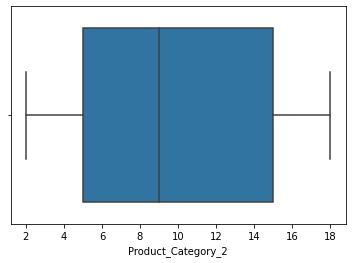

In [575]:
sns.boxplot('Product_Category_2',data=train)

In [601]:
train.drop(["Product_ID"],axis=1,inplace=True)   

In [576]:
train["Product_Category_2"].mean()

9.842329251122386

In [577]:
Z



In [578]:
impute_nan(train,fill_value=0,fill_types=["random_sample_fill"],columns=["Product_Category_2","Product_Category_3"],dataframe_name="Train")

missing value before removal in Train data


Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

missing value after removal in Train data


Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,2.0,6.0,8370
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,P00087842,F,0-17,10,A,2,0,12,2.0,9.0,1422
3,P00085442,F,0-17,10,A,2,0,12,14.0,9.0,1057
4,P00285442,M,55+,16,C,4+,0,8,8.0,12.0,7969
...,...,...,...,...,...,...,...,...,...,...,...
550063,P00372445,M,51-55,13,B,1,1,20,17.0,12.0,368
550064,P00375436,F,26-35,1,C,3,0,20,17.0,5.0,371
550065,P00375436,F,26-35,15,B,4+,1,20,15.0,14.0,137
550066,P00375436,F,55+,1,C,2,0,20,8.0,16.0,365


In [579]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  550068 non-null  object 
 1   Gender                      550068 non-null  object 
 2   Age                         550068 non-null  object 
 3   Occupation                  550068 non-null  int64  
 4   City_Category               550068 non-null  object 
 5   Stay_In_Current_City_Years  550068 non-null  object 
 6   Marital_Status              550068 non-null  int64  
 7   Product_Category_1          550068 non-null  int64  
 8   Product_Category_2          550068 non-null  float64
 9   Product_Category_3          550068 non-null  float64
 10  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 46.2+ MB


In [580]:
train['Gender']=train['Gender'].map({"M":1,'F':0})

#pd.get_dummies(train["Gender"],drop_first=True) 
# can use this method for more categories in a table her only male and female is there so above method is good 
# otherwise use dummeis

In [581]:
train['Gender']

0         0
1         0
2         0
3         0
4         1
         ..
550063    1
550064    0
550065    0
550066    0
550067    0
Name: Gender, Length: 550068, dtype: int64

In [582]:
#fixing the categorical feature
train['Age'].unique()


array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [583]:
train['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [584]:
train['Age'].map({'26-35':7,'36-45':6,'18-25':5,'46-50':4,'51-55':3,'55+':2,'0-17':1})

0         1
1         1
2         1
3         1
4         2
         ..
550063    3
550064    7
550065    7
550066    2
550067    4
Name: Age, Length: 550068, dtype: int64

In [585]:
pd.get_dummies(train['Age'])

,0-17,18-25,26-35,36-45,46-50,51-55,55+
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...
550063,0,0,0,0,0,1,0
550064,0,0,1,0,0,0,0
550065,0,0,1,0,0,0,0
550066,0,0,0,0,0,0,1


In [586]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
train["Age"]=label_encoder.fit_transform(train["Age"])

In [587]:
train

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0,10,A,2,0,3,2.0,6.0,8370
1,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200
2,P00087842,0,0,10,A,2,0,12,2.0,9.0,1422
3,P00085442,0,0,10,A,2,0,12,14.0,9.0,1057
4,P00285442,1,6,16,C,4+,0,8,8.0,12.0,7969
...,...,...,...,...,...,...,...,...,...,...,...
550063,P00372445,1,5,13,B,1,1,20,17.0,12.0,368
550064,P00375436,0,2,1,C,3,0,20,17.0,5.0,371
550065,P00375436,0,2,15,B,4+,1,20,15.0,14.0,137
550066,P00375436,0,6,1,C,2,0,20,8.0,16.0,365


In [588]:
train['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [589]:
train_city=pd.get_dummies(train['City_Category'],drop_first=True)

In [590]:
train_city

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1
...,...,...
550063,1,0
550064,0,1
550065,1,0
550066,0,1


In [591]:
train=pd.concat([train,train_city],axis=1)

In [592]:
train.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,0,10,A,2,0,3,2.0,6.0,8370,0,0
1,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200,0,0
2,P00087842,0,0,10,A,2,0,12,2.0,9.0,1422,0,0
3,P00085442,0,0,10,A,2,0,12,14.0,9.0,1057,0,0
4,P00285442,1,6,16,C,4+,0,8,8.0,12.0,7969,0,1


In [593]:
train.drop("City_Category",axis=1,inplace=True)

In [594]:
train

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,0,10,2,0,3,2.0,6.0,8370,0,0
1,P00248942,0,0,10,2,0,1,6.0,14.0,15200,0,0
2,P00087842,0,0,10,2,0,12,2.0,9.0,1422,0,0
3,P00085442,0,0,10,2,0,12,14.0,9.0,1057,0,0
4,P00285442,1,6,16,4+,0,8,8.0,12.0,7969,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,P00372445,1,5,13,1,1,20,17.0,12.0,368,1,0
550064,P00375436,0,2,1,3,0,20,17.0,5.0,371,0,1
550065,P00375436,0,2,15,4+,1,20,15.0,14.0,137,1,0
550066,P00375436,0,6,1,2,0,20,8.0,16.0,365,0,1


In [598]:
train['Stay_In_Current_City_Years']=train['Stay_In_Current_City_Years'].str.replace("+","")  #when er we use replace we should change it to str

C:\Users\ROHEN\AppData\Local\Temp/ipykernel_24480/2911169988.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  train['Stay_In_Current_City_Years']=train['Stay_In_Current_City_Years'].str.replace("+","")  #when er we use replace we should change it to str


In [602]:
train

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,0,10,2,0,3,2.0,6.0,8370,0,0
1,0,0,10,2,0,1,6.0,14.0,15200,0,0
2,0,0,10,2,0,12,2.0,9.0,1422,0,0
3,0,0,10,2,0,12,14.0,9.0,1057,0,0
4,1,6,16,4,0,8,8.0,12.0,7969,0,1
...,...,...,...,...,...,...,...,...,...,...,...
550063,1,5,13,1,1,20,17.0,12.0,368,1,0
550064,0,2,1,3,0,20,17.0,5.0,371,0,1
550065,0,2,15,4,1,20,15.0,14.0,137,1,0
550066,0,6,1,2,0,20,8.0,16.0,365,0,1


In [603]:
train.info() #we should check the info at last and see whether all are int or float if not we shoul convert it to int

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      550068 non-null  int64  
 1   Age                         550068 non-null  int32  
 2   Occupation                  550068 non-null  int64  
 3   Stay_In_Current_City_Years  550068 non-null  object 
 4   Marital_Status              550068 non-null  int64  
 5   Product_Category_1          550068 non-null  int64  
 6   Product_Category_2          550068 non-null  float64
 7   Product_Category_3          550068 non-null  float64
 8   Purchase                    550068 non-null  int64  
 9   B                           550068 non-null  uint8  
 10  C                           550068 non-null  uint8  
dtypes: float64(2), int32(1), int64(5), object(1), uint8(2)
memory usage: 36.7+ MB


In [605]:
train['Stay_In_Current_City_Years']=train['Stay_In_Current_City_Years'].astype(int)

In [606]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      550068 non-null  int64  
 1   Age                         550068 non-null  int32  
 2   Occupation                  550068 non-null  int64  
 3   Stay_In_Current_City_Years  550068 non-null  int32  
 4   Marital_Status              550068 non-null  int64  
 5   Product_Category_1          550068 non-null  int64  
 6   Product_Category_2          550068 non-null  float64
 7   Product_Category_3          550068 non-null  float64
 8   Purchase                    550068 non-null  int64  
 9   B                           550068 non-null  uint8  
 10  C                           550068 non-null  uint8  
dtypes: float64(2), int32(2), int64(5), uint8(2)
memory usage: 34.6 MB


In [607]:
train['B']=train['B'].astype(int)
train['C']=train['C'].astype(int)

In [608]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      550068 non-null  int64  
 1   Age                         550068 non-null  int32  
 2   Occupation                  550068 non-null  int64  
 3   Stay_In_Current_City_Years  550068 non-null  int32  
 4   Marital_Status              550068 non-null  int64  
 5   Product_Category_1          550068 non-null  int64  
 6   Product_Category_2          550068 non-null  float64
 7   Product_Category_3          550068 non-null  float64
 8   Purchase                    550068 non-null  int64  
 9   B                           550068 non-null  int32  
 10  C                           550068 non-null  int32  
dtypes: float64(2), int32(4), int64(5)
memory usage: 37.8 MB


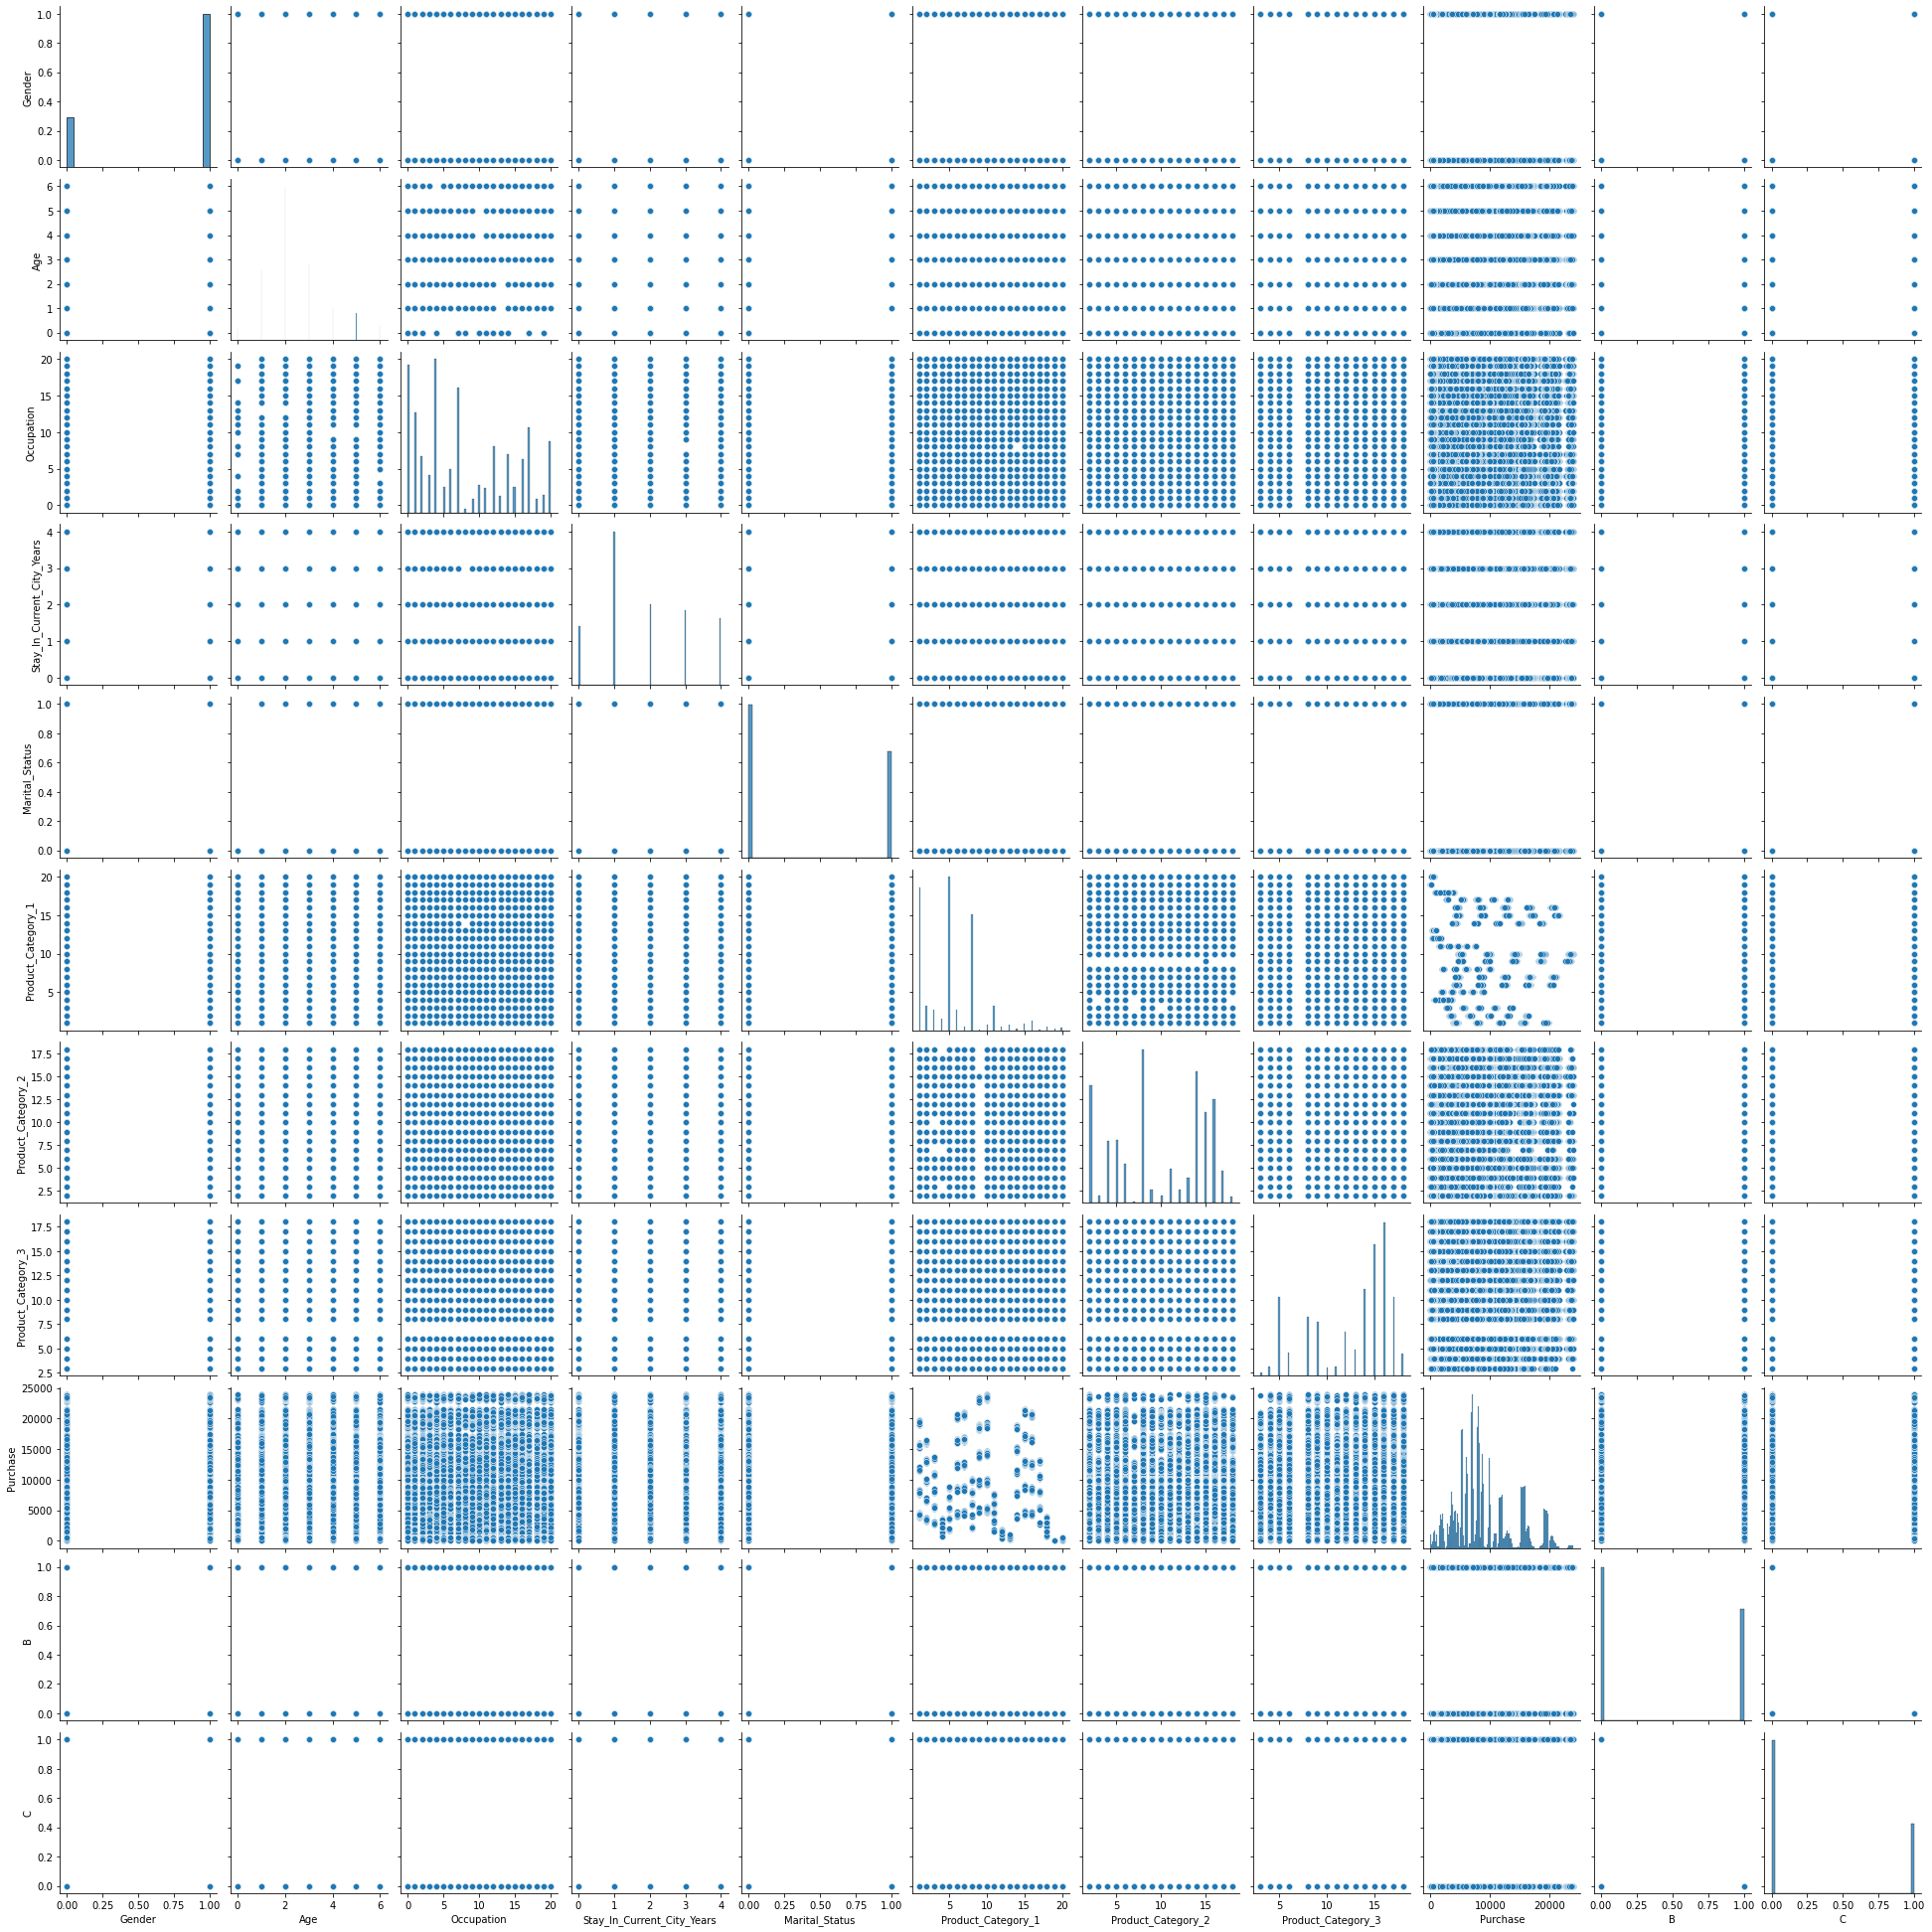

In [609]:
   #visualization
   sns.pairplot(train)

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

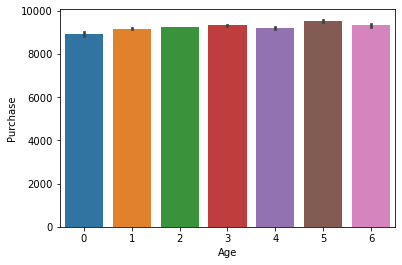

In [613]:
sns.barplot(x='Age',y='Purchase',data=train)   #HUE=MALE OR FEMALE WE CAN GIVE FOR GENDER SPECIFIC

<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

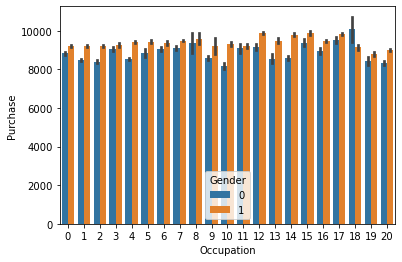

In [615]:
sns.barplot(x='Occupation',y='Purchase',hue='Gender',data=train)

<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

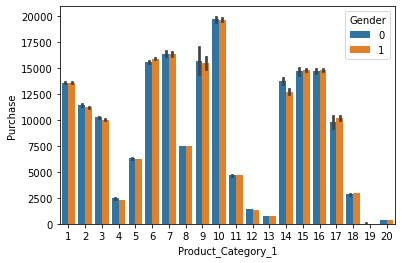

In [616]:
sns.barplot(x='Product_Category_1',y='Purchase',hue='Gender',data=train)

<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

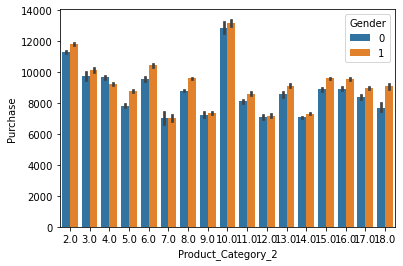

In [617]:
sns.barplot(x='Product_Category_2',y='Purchase',hue='Gender',data=train)

<AxesSubplot:xlabel='Product_Category_3', ylabel='Purchase'>

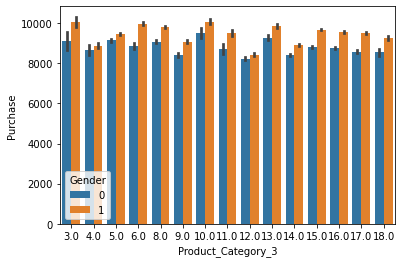

In [618]:
sns.barplot(x='Product_Category_3',y='Purchase',hue='Gender',data=train)

In [621]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
new_train=sc.fit_transform(train)

In [622]:
new_train

array([[-1.74651251, -1.84424754,  0.29486356, ..., -0.1779729 ,
        -0.85142167, -0.67214331],
       [-1.74651251, -1.84424754,  0.29486356, ...,  1.1817558 ,
        -0.85142167, -0.67214331],
       [-1.74651251, -1.84424754,  0.29486356, ..., -1.56119326,
        -0.85142167, -0.67214331],
       ...,
       [-1.74651251, -0.36673935,  1.06142262, ..., -1.81701338,
         1.17450616, -0.67214331],
       [-1.74651251,  2.58827703, -1.08494277, ..., -1.77162273,
        -0.85142167,  1.48777797],
       [-1.74651251,  1.11076884, -1.23825458, ..., -1.7467375 ,
         1.17450616, -0.67214331]])

In [623]:
pd.DataFrame(new_train)

,0,1,2,3,4,5,6,7,8,9,10
0,-1.746513,-1.844248,0.294864,0.109801,-0.833018,-0.610809,-1.540935,-1.616479,-0.177973,-0.851422,-0.672143
1,-1.746513,-1.844248,0.294864,0.109801,-0.833018,-1.118912,-0.754650,0.322257,1.181756,-0.851422,-0.672143
2,-1.746513,-1.844248,0.294864,0.109801,-0.833018,1.675656,-1.540935,-0.889453,-1.561193,-0.851422,-0.672143
3,-1.746513,-1.844248,0.294864,0.109801,-0.833018,1.675656,0.817919,-0.889453,-1.633858,-0.851422,-0.672143
4,0.572570,2.588277,1.214734,1.660861,-0.833018,0.659449,-0.361508,-0.162427,-0.257805,-0.851422,1.487778
...,...,...,...,...,...,...,...,...,...,...,...
550063,0.572570,1.849523,0.754799,-0.665728,1.200454,3.708069,1.407632,-0.162427,-1.771025,1.174506,-0.672143
550064,-1.746513,-0.366739,-1.084943,0.885331,-0.833018,3.708069,1.407632,-1.858821,-1.770428,-0.851422,1.487778
550065,-1.746513,-0.366739,1.061423,1.660861,1.200454,3.708069,1.014490,0.322257,-1.817013,1.174506,-0.672143
550066,-1.746513,2.588277,-1.084943,0.109801,-0.833018,3.708069,-0.361508,0.806941,-1.771623,-0.851422,1.487778
